In [20]:
# import statements

import pandas as pd
import matplotlib.pylab as plt 
import numpy as np

In [21]:
# load participants tsv into pandas 

df = pd.read_csv('~/Steinhardt/participants.csv')

In [22]:
# build dictionary of xgb_qsiprep_qc_score, num participants with that score 

subids_scores = {}
for row in range(len(df)):
    subid = df.loc[row, 'subject_id']
    score = df.loc[row, 'xgb_qsiprep_qc_score']
    subids_scores[subid] = score
    

array([[<AxesSubplot:title={'center':'xgb_qsiprep_qc_score'}>]],
      dtype=object)

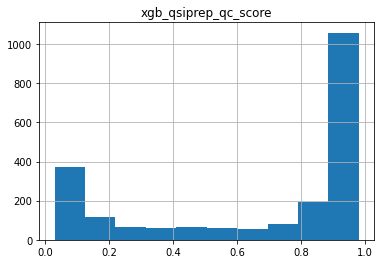

In [23]:
df.hist(column='xgb_qsiprep_qc_score')

In [24]:
sub_list = []
for row in range(len(df)): 
    subid = df.loc[row, 'subject_id']
    score = df.loc[row, 'xgb_qsiprep_qc_score']
    if score > 0.5: 
        sub_list.append(subid)
len(sub_list)

1455

In [25]:
# create dataframe with only subjects with xgb_qsiprep_qc_score > 0.5

df_QCed = df[df.subject_id.isin(sub_list)]
df_QCed.reset_index(inplace=True, drop=True)

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

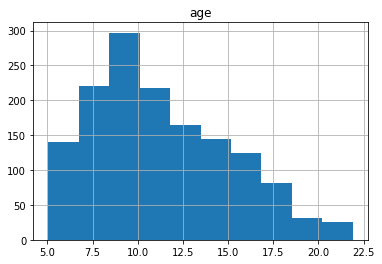

In [26]:
df_QCed.hist(column='age')

In [27]:
# add column to df_QCed with the histogram bucket to which their age corresponds 
# see above for histogram buckets (of 2.5 years each starting at 5 and ending at 22.5)

for row in range(len(df_QCed)): 
    age = df_QCed.loc[row, 'age']
    if age < 7.5:
        df_QCed.loc[row, 'Age_Bucket'] = 1
    elif 7.5 < age < 10: 
        df_QCed.loc[row, 'Age_Bucket'] = 2
    elif 10 < age < 12.5:
        df_QCed.loc[row, 'Age_Bucket'] = 3
    elif 12.5 < age < 15:
        df_QCed.loc[row, 'Age_Bucket'] = 4
    elif 15 < age < 17.5:
        df_QCed.loc[row, 'Age_Bucket'] = 5
    elif 17.5 < age < 20:
        df_QCed.loc[row, 'Age_Bucket'] = 6
    elif age > 20:
        df_QCed.loc[row, 'Age_Bucket'] = 7
df_QCed

/var/folders/rj/twzk7v_50w70c2bsxb6s6cs40000gp/T/ipykernel_19256/773913350.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_QCed.loc[row, 'Age_Bucket'] = 7


,subject_id,scan_site_id,sex,age,ehq_total,commercial_use,full_pheno,expert_qc_score,xgb_qc_score,xgb_qsiprep_qc_score,dl_qc_score,site_variant,Age_Bucket
0,sub-NDARAA306NT2,RU,F,21.216746,6.67,Yes,Yes,NaN,0.850,0.554065,0.470,RU_64dir_Most_Common,7.0
1,sub-NDARAA536PTU,SI,M,11.998402,-86.67,No,Yes,NaN,NaN,0.962119,0.701,SI_64dir_Obliquity,3.0
2,sub-NDARAA947ZG5,CBIC,M,13.627880,80.00,Yes,Yes,NaN,0.576,0.551769,0.509,CBIC_64dir_Most_Common,4.0
3,sub-NDARAA948VFH,RU,F,7.982660,90.00,Yes,Yes,NaN,0.990,0.954094,0.979,RU_64dir_Most_Common,2.0
4,sub-NDARAB348EWR,CBIC,M,5.805384,80.00,Yes,Yes,NaN,0.652,0.948804,0.705,CBIC_64dir_Most_Common,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,sub-NDARZW619BDL,CBIC,M,10.120123,100.00,Yes,Yes,NaN,0.960,0.966098,0.945,CBIC_64dir_Most_Common,3.0
1451,sub-NDARZW873DN3,CBIC,F,13.436344,73.34,Yes,Yes,NaN,0.979,0.916777,0.982,CBIC_64dir_Most_Common,4.0
1452,sub-NDARZX163EWC,CBIC,F,9.898471,46.67,Yes,Yes,NaN,0.950,0.950406,0.993,CBIC_64dir_Most_Common,2.0
1453,sub-NDARZY101JNB,CBIC,M,7.517111,40.00,Yes,Yes,NaN,0.975,0.958520,0.992,CBIC_64dir_Most_Common,2.0


In [28]:
# list of 24 subjects with no recon outputs
# need to make sure these aren't in the subsample
l_no_recon = ['sub-NDARAC349YUC',
'sub-NDARAP457WB5',
'sub-NDARAX277ATU',
'sub-NDARCC340ER5',
'sub-NDARCF052AE0',
'sub-NDAREK686WN1',
'sub-NDAREX065KJU',
'sub-NDARFT176NJP',
'sub-NDARHY676RYH',
'sub-NDARJW989EM6',
'sub-NDARKV461KGZ',
'sub-NDARMK046ZRK',
'sub-NDARNA055LLN',
'sub-NDARNF873FCV',
'sub-NDARPG072ZZ7',
'sub-NDARPH513LP3',
'sub-NDARRK163VY8',
'sub-NDARRN619WHY',
'sub-NDARRY126FA5',
'sub-NDARUK329RUU',
'sub-NDARWX033HYK',
'sub-NDARWZ283CWB',
'sub-NDARWZ865ZMK',
'sub-NDARYG819TE6']

len(l_no_recon)

for row in range(len(df_QCed)):
    if df_QCed.loc[row, 'subject_id'] in l_no_recon:
        df_QCed.loc[row, 'Has_Recon_Outputs'] = False
    else:
        df_QCed.loc[row, 'Has_Recon_Outputs'] = True

df_QCed

/var/folders/rj/twzk7v_50w70c2bsxb6s6cs40000gp/T/ipykernel_19256/2966644898.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_QCed.loc[row, 'Has_Recon_Outputs'] = True


,subject_id,scan_site_id,sex,age,ehq_total,commercial_use,full_pheno,expert_qc_score,xgb_qc_score,xgb_qsiprep_qc_score,dl_qc_score,site_variant,Age_Bucket,Has_Recon_Outputs
0,sub-NDARAA306NT2,RU,F,21.216746,6.67,Yes,Yes,NaN,0.850,0.554065,0.470,RU_64dir_Most_Common,7.0,True
1,sub-NDARAA536PTU,SI,M,11.998402,-86.67,No,Yes,NaN,NaN,0.962119,0.701,SI_64dir_Obliquity,3.0,True
2,sub-NDARAA947ZG5,CBIC,M,13.627880,80.00,Yes,Yes,NaN,0.576,0.551769,0.509,CBIC_64dir_Most_Common,4.0,True
3,sub-NDARAA948VFH,RU,F,7.982660,90.00,Yes,Yes,NaN,0.990,0.954094,0.979,RU_64dir_Most_Common,2.0,True
4,sub-NDARAB348EWR,CBIC,M,5.805384,80.00,Yes,Yes,NaN,0.652,0.948804,0.705,CBIC_64dir_Most_Common,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,sub-NDARZW619BDL,CBIC,M,10.120123,100.00,Yes,Yes,NaN,0.960,0.966098,0.945,CBIC_64dir_Most_Common,3.0,True
1451,sub-NDARZW873DN3,CBIC,F,13.436344,73.34,Yes,Yes,NaN,0.979,0.916777,0.982,CBIC_64dir_Most_Common,4.0,True
1452,sub-NDARZX163EWC,CBIC,F,9.898471,46.67,Yes,Yes,NaN,0.950,0.950406,0.993,CBIC_64dir_Most_Common,2.0,True
1453,sub-NDARZY101JNB,CBIC,M,7.517111,40.00,Yes,Yes,NaN,0.975,0.958520,0.992,CBIC_64dir_Most_Common,2.0,True


,subject_id,scan_site_id,sex,age,ehq_total,commercial_use,full_pheno,expert_qc_score,xgb_qc_score,xgb_qsiprep_qc_score,dl_qc_score,site_variant,Age_Bucket,Has_Recon_Outputs
0,sub-NDARTX795AKR,RU,M,6.019621,86.67,Yes,Yes,NaN,0.852,0.594319,0.912,RU_64dir_Most_Common,1.0,True
1,sub-NDARJM708VGE,SI,M,10.553045,73.34,No,Yes,NaN,NaN,0.956121,0.928,SI_64dir_Most_Common,3.0,True
2,sub-NDARWB685NUG,SI,F,11.409765,66.67,No,Yes,NaN,NaN,0.952562,0.951,SI_64dir_Most_Common,3.0,True
3,sub-NDARMW473LL1,RU,F,6.145334,100.00,Yes,Yes,NaN,0.214,0.616979,0.735,RU_64dir_Most_Common,1.0,True
4,sub-NDARNE406XC3,RU,M,9.061145,100.00,Yes,Yes,NaN,0.815,0.710276,0.748,RU_64dir_Most_Common,2.0,True
5,sub-NDAREM731BYM,RU,M,11.850673,100.00,Yes,Yes,NaN,0.971,0.942930,0.999,RU_64dir_Obliquity,3.0,True
6,sub-NDARJZ526HN3,RU,M,12.584302,100.00,Yes,Yes,NaN,0.986,0.972742,0.993,RU_64dir_Most_Common,4.0,True
7,sub-NDARCG808HDJ,CBIC,F,9.477412,40.00,Yes,Yes,NaN,0.972,0.960318,0.807,CBIC_64dir_Most_Common,2.0,True
8,sub-NDARYJ334EHH,RU,F,9.917750,86.67,Yes,Yes,NaN,0.989,0.965092,0.988,RU_64dir_Most_Common,2.0,True
9,sub-NDARNU770PM5,CBIC,F,9.263860,100.00,Yes,Yes,NaN,0.920,0.906541,0.938,CBIC_64dir_Most_Common,2.0,True


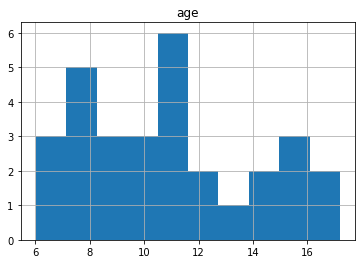

In [41]:
# do stratified proportional random subsampling based on sex, scan_site_id, and age
# source: https://www.statology.org/stratified-sampling-pandas/

# define total sample size desired
N = 32

# perform stratified random sampling on sex, scanner, and age (using age bucket of 2.5 years)
# NOTE: ONLY GIVES 30 NOT 32! 

stratified_subsample = df_QCed.groupby(['sex','scan_site_id', 'Age_Bucket'], group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df_QCed))))).sample(frac=1).reset_index(drop=True)

stratified_subsample.hist('age')
stratified_subsample


In [42]:
stratified_subsample.Has_Recon_Outputs

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
Name: Has_Recon_Outputs, dtype: object

In [43]:
for sub in stratified_subsample.subject_id:
    print(sub)
print(len(stratified_subsample))

sub-NDARTX795AKR
sub-NDARJM708VGE
sub-NDARWB685NUG
sub-NDARMW473LL1
sub-NDARNE406XC3
sub-NDAREM731BYM
sub-NDARJZ526HN3
sub-NDARCG808HDJ
sub-NDARYJ334EHH
sub-NDARNU770PM5
sub-NDARHZ375JRF
sub-NDARNX125KJ1
sub-NDARFR601RDQ
sub-NDARFG851ZNZ
sub-NDARAC331VEH
sub-NDARDJ544BU5
sub-NDARUY876VL1
sub-NDARTF781TM8
sub-NDARHH757RT9
sub-NDARXR123PFR
sub-NDARKF442GZ5
sub-NDARLY483UNZ
sub-NDARTT383DPY
sub-NDARBJ674TVU
sub-NDARDX196MZP
sub-NDARED632KNG
sub-NDARPE830YU0
sub-NDARHD017XEU
sub-NDARCH001CN2
sub-NDARBF183RFB
30


In [44]:
stratified_subsample['Age_Bucket'].value_counts(normalize=True) * 100

3.0    26.666667
2.0    26.666667
1.0    16.666667
5.0    16.666667
4.0    13.333333
Name: Age_Bucket, dtype: float64

In [45]:
df_QCed['Age_Bucket'].value_counts(normalize=True) * 100

2.0    28.442907
3.0    21.660900
1.0    15.640138
4.0    15.294118
5.0    12.318339
6.0     4.705882
7.0     1.937716
Name: Age_Bucket, dtype: float64

In [46]:
stratified_subsample['sex'].value_counts(normalize=True) * 100

M    56.666667
F    43.333333
Name: sex, dtype: float64

In [47]:
df_QCed['sex'].value_counts(normalize=True) * 100

M    61.134163
F    38.865837
Name: sex, dtype: float64

In [48]:
stratified_subsample['scan_site_id'].value_counts(normalize=True) * 100

CBIC    46.666667
RU      40.000000
SI      13.333333
Name: scan_site_id, dtype: float64

In [49]:
df_QCed['scan_site_id'].value_counts(normalize=True) * 100

CBIC    43.711340
RU      35.945017
SI      16.769759
CUNY     3.573883
Name: scan_site_id, dtype: float64

In [50]:
# build templateInput.csv for ANTs run
# first template has preprocessed T1w & brain mask (from qsiprep), and q2, q4, & q6 SOP (from qsirecon scalarfest)
# all in native space

template_df = pd.DataFrame(columns = ['Preprocessed_T1', 'Brain_Mask', 'q2SOP', 'q4SOP', 'q6SOP'])
template_df['Preprocessed_T1'] = stratified_subsample['subject_id'] + '_desc-preproc_T1w.nii.gz'
template_df['Brain_Mask'] = stratified_subsample['subject_id'] + '_desc-brain_mask.nii.gz'
template_df['q2SOP'] = stratified_subsample['subject_id'] + '_ses-HBNsite' + stratified_subsample['scan_site_id'] + '_acq-64dir_space-T1w_desc-preproc_q-2_SOP.nii.gz'
template_df['q4SOP'] = stratified_subsample['subject_id'] + '_ses-HBNsite' + stratified_subsample['scan_site_id'] + '_acq-64dir_space-T1w_desc-preproc_q-4_SOP.nii.gz'
template_df['q6SOP'] = stratified_subsample['subject_id'] + '_ses-HBNsite' + stratified_subsample['scan_site_id'] + '_acq-64dir_space-T1w_desc-preproc_q-6_SOP.nii.gz'

template_df = template_df.reset_index(drop=True)
template_df.to_csv('/Users/scovitz/Steinhardt/templateInput.csv', index=False, header=False)



In [51]:
for sub in stratified_subsample['subject_id']:
    print(sub + ' ')

sub-NDARTX795AKR 
sub-NDARJM708VGE 
sub-NDARWB685NUG 
sub-NDARMW473LL1 
sub-NDARNE406XC3 
sub-NDAREM731BYM 
sub-NDARJZ526HN3 
sub-NDARCG808HDJ 
sub-NDARYJ334EHH 
sub-NDARNU770PM5 
sub-NDARHZ375JRF 
sub-NDARNX125KJ1 
sub-NDARFR601RDQ 
sub-NDARFG851ZNZ 
sub-NDARAC331VEH 
sub-NDARDJ544BU5 
sub-NDARUY876VL1 
sub-NDARTF781TM8 
sub-NDARHH757RT9 
sub-NDARXR123PFR 
sub-NDARKF442GZ5 
sub-NDARLY483UNZ 
sub-NDARTT383DPY 
sub-NDARBJ674TVU 
sub-NDARDX196MZP 
sub-NDARED632KNG 
sub-NDARPE830YU0 
sub-NDARHD017XEU 
sub-NDARCH001CN2 
sub-NDARBF183RFB 


In [10]:
old = pd.read_csv('/Users/scovitz/Steinhardt/templateInput.csv', header=None)
old

,0,1,2,3
0,sub-NDARTX795AKR_applied_T1w_mask.nii.gz,sub-NDARTX795AKR_ses-HBNsiteRU_acq-64dir_space...,sub-NDARTX795AKR_ses-HBNsiteRU_acq-64dir_space...,sub-NDARTX795AKR_ses-HBNsiteRU_acq-64dir_space...
1,sub-NDARJM708VGE_applied_T1w_mask.nii.gz,sub-NDARJM708VGE_ses-HBNsiteSI_acq-64dir_space...,sub-NDARJM708VGE_ses-HBNsiteSI_acq-64dir_space...,sub-NDARJM708VGE_ses-HBNsiteSI_acq-64dir_space...
2,sub-NDARWB685NUG_applied_T1w_mask.nii.gz,sub-NDARWB685NUG_ses-HBNsiteSI_acq-64dir_space...,sub-NDARWB685NUG_ses-HBNsiteSI_acq-64dir_space...,sub-NDARWB685NUG_ses-HBNsiteSI_acq-64dir_space...
3,sub-NDARMW473LL1_applied_T1w_mask.nii.gz,sub-NDARMW473LL1_ses-HBNsiteRU_acq-64dir_space...,sub-NDARMW473LL1_ses-HBNsiteRU_acq-64dir_space...,sub-NDARMW473LL1_ses-HBNsiteRU_acq-64dir_space...
4,sub-NDARNE406XC3_applied_T1w_mask.nii.gz,sub-NDARNE406XC3_ses-HBNsiteRU_acq-64dir_space...,sub-NDARNE406XC3_ses-HBNsiteRU_acq-64dir_space...,sub-NDARNE406XC3_ses-HBNsiteRU_acq-64dir_space...
5,sub-NDAREM731BYM_applied_T1w_mask.nii.gz,sub-NDAREM731BYM_ses-HBNsiteRU_acq-64dirVARIAN...,sub-NDAREM731BYM_ses-HBNsiteRU_acq-64dirVARIAN...,sub-NDAREM731BYM_ses-HBNsiteRU_acq-64dirVARIAN...
6,sub-NDARJZ526HN3_applied_T1w_mask.nii.gz,sub-NDARJZ526HN3_ses-HBNsiteRU_acq-64dir_space...,sub-NDARJZ526HN3_ses-HBNsiteRU_acq-64dir_space...,sub-NDARJZ526HN3_ses-HBNsiteRU_acq-64dir_space...
7,sub-NDARCG808HDJ_applied_T1w_mask.nii.gz,sub-NDARCG808HDJ_ses-HBNsiteCBIC_acq-64dir_spa...,sub-NDARCG808HDJ_ses-HBNsiteCBIC_acq-64dir_spa...,sub-NDARCG808HDJ_ses-HBNsiteCBIC_acq-64dir_spa...
8,sub-NDARYJ334EHH_applied_T1w_mask.nii.gz,sub-NDARYJ334EHH_ses-HBNsiteRU_acq-64dir_space...,sub-NDARYJ334EHH_ses-HBNsiteRU_acq-64dir_space...,sub-NDARYJ334EHH_ses-HBNsiteRU_acq-64dir_space...
9,sub-NDARNU770PM5_applied_T1w_mask.nii.gz,sub-NDARNU770PM5_ses-HBNsiteCBIC_acq-64dir_spa...,sub-NDARNU770PM5_ses-HBNsiteCBIC_acq-64dir_spa...,sub-NDARNU770PM5_ses-HBNsiteCBIC_acq-64dir_spa...


In [4]:
import pandas as pd

df = pd.DataFrame(columns = ['T1', 'FA'])
df['FA'] = ["sub-NDARAC331VEH_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARBF183RFB_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARBJ674TVU_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARCG808HDJ_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARCH001CN2_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARDJ544BU5_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARDX196MZP_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARED632KNG_ses-HBNsiteSI_acq-64dirVARIANTObliquity_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDAREM731BYM_ses-HBNsiteRU_acq-64dirVARIANTObliquity_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARFG851ZNZ_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARFR601RDQ_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARHD017XEU_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARHH757RT9_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARHZ375JRF_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARJM708VGE_ses-HBNsiteSI_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARJZ526HN3_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARKF442GZ5_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARLY483UNZ_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARMW473LL1_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARNE406XC3_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARNU770PM5_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARNX125KJ1_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARPE830YU0_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARTF781TM8_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARTT383DPY_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARTX795AKR_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARUY876VL1_ses-HBNsiteSI_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARWB685NUG_ses-HBNsiteSI_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARXR123PFR_ses-HBNsiteCBIC_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",
"sub-NDARYJ334EHH_ses-HBNsiteRU_acq-64dir_space-T1w_desc-preproc_desc-dti_fa_gqiscalar.nii.gz",]

In [13]:
df['T1'] = old[0]
df

,T1,FA
0,sub-NDARTX795AKR_applied_T1w_mask.nii.gz,sub-NDARAC331VEH_ses-HBNsiteCBIC_acq-64dir_spa...
1,sub-NDARJM708VGE_applied_T1w_mask.nii.gz,sub-NDARBF183RFB_ses-HBNsiteCBIC_acq-64dir_spa...
2,sub-NDARWB685NUG_applied_T1w_mask.nii.gz,sub-NDARBJ674TVU_ses-HBNsiteRU_acq-64dir_space...
3,sub-NDARMW473LL1_applied_T1w_mask.nii.gz,sub-NDARCG808HDJ_ses-HBNsiteCBIC_acq-64dir_spa...
4,sub-NDARNE406XC3_applied_T1w_mask.nii.gz,sub-NDARCH001CN2_ses-HBNsiteRU_acq-64dir_space...
5,sub-NDAREM731BYM_applied_T1w_mask.nii.gz,sub-NDARDJ544BU5_ses-HBNsiteCBIC_acq-64dir_spa...
6,sub-NDARJZ526HN3_applied_T1w_mask.nii.gz,sub-NDARDX196MZP_ses-HBNsiteCBIC_acq-64dir_spa...
7,sub-NDARCG808HDJ_applied_T1w_mask.nii.gz,sub-NDARED632KNG_ses-HBNsiteSI_acq-64dirVARIAN...
8,sub-NDARYJ334EHH_applied_T1w_mask.nii.gz,sub-NDAREM731BYM_ses-HBNsiteRU_acq-64dirVARIAN...
9,sub-NDARNU770PM5_applied_T1w_mask.nii.gz,sub-NDARFG851ZNZ_ses-HBNsiteCBIC_acq-64dir_spa...


In [14]:
df.to_csv('/Users/scovitz/Steinhardt/fa_template_inputs.csv', header=False, index=False)

### 